In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 使图形中的中文正常显示
%config InlineBackend.figure_format = 'svg' # 将输出的图创建为svg

# 1、数据清洗和提取

In [3]:
# 导入数据，将数据id列作为索引
df = pd.read_excel('../data/某电商网站订单数据.xlsx', index_col='id')
# 显示数据字段信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104557 non-null  object        
 1   userID        104557 non-null  object        
 2   goodsID       104557 non-null  object        
 3   orderAmount   104557 non-null  float64       
 4   payment       104557 non-null  float64       
 5   chanelID      104549 non-null  object        
 6   platfromType  104557 non-null  object        
 7   orderTime     104557 non-null  datetime64[ns]
 8   payTime       104557 non-null  datetime64[ns]
 9   chargeback    104557 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 8.8+ MB


In [4]:
# 查看前10行数据（默认5行）
df.head(10)

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否


In [5]:
# 查看末尾5行数据
df.tail()

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,Wech atMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,Wech atMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否
104556,sys-2020-279922239,user-173702,PR000387,1206.76,1029.46,渠道-0985,APP,2020-01-01 23:47:01,2020-01-01 23:47:48,否
104557,sys-2020-250738010,user-164299,PR000525,3053.70,2982.26,渠道-0007,APP,2020-01-01 23:48:26,2020-01-01 23:49:44,否


In [6]:
# 修改有问题的列名
df.rename(columns={'chanelID': 'channelID', 'platfromType': 'platformType'}, inplace=True)
df.head()

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否


In [7]:
# 提取2019年的订单数据
from datetime import datetime

start = datetime(2019, 1, 1)
end = datetime(2019, 12, 31, 23, 59, 59)
df.drop(index=df[df.orderTime < start].index, inplace=True)
df.drop(index=df[df.orderTime > end].index, inplace=True)

df.head()

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否


In [8]:
# 查看数据形状 （行数，列数）
df.shape

(104296, 10)

In [9]:
# 处理与业务流程不符的数据
# 删除支付时间早于下单时间的数据
df.drop(index=df[df.payTime < df.orderTime].index, inplace=True)
df.shape

(104291, 10)

In [10]:
# 删除支付时长超过30分钟的数据
delta = df.payTime - df.orderTime
df.drop(index=df[(delta.dt.days > 0) | (delta.dt.seconds > 1800)].index, inplace=True)
df.shape

(103354, 10)

In [11]:
# 删除订单金额或支付金额小于
df.drop(df[(df.orderAmount < 0) | (df.payment < 0)].index, inplace=True)
df.shape

(103348, 10)

In [12]:
# 处理渠道为空的数据（补充众数）
most_common_channel = df.channelID.mode()[0]
df.channelID.fillna(value=most_common_channel, inplace=True)
# 查看渠道是否还有空值（True：有   False：没有）
df.channelID.hasnans

False

In [13]:
# 处理平台类型字段（去掉多余的空格，保持数据一致）
df['platformType'] = df.platformType.replace(r'\s', '', regex=True).str.title()
df.head()

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,Wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,App,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,Alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否


In [14]:
# 添加折扣字段，处理折扣大于1的字段，将支付金额修改为“订单金额*平均折扣”
df['discount'] = df.payment / df.orderAmount
mean_discount = df.discount[df.discount <= 1].mean()
# 折扣大于1，替换为平均折扣
df['payment'] = df.payment.mask(df.discount > 1,np.round(df.orderAmount * mean_discount, 2))
# 查看是否还有支付金额大于订单金额的数据（折扣大于1）
df[df.payment > df.orderAmount].index

Int64Index([], dtype='int64', name='id')

# 2、数据透视和可视化

In [15]:
# 交易总金额（GMV）、总销售额、实际销售额
gmv = df.orderAmount.sum()
sales = df.payment.sum()
real = df[df.chargeback == '否'].payment.sum()

In [16]:
# 退货率、客单价
back_rate = df[df.chargeback == '是'].orderID.count() / df.orderID.count()
arppu = real / df.userID.nunique()

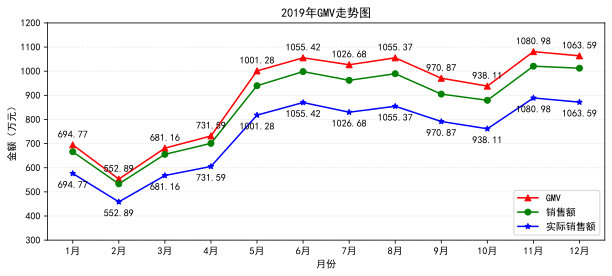

In [17]:
# 每月GMV、销售额、实际销售额及趋势分析（折线图）
# 添加月份字段
df['month'] = df.orderTime.dt.month
x = [f'{x}月' for x in range(1, 13)]
# 通过月份分组，金额以万为单位
gmv_ser = np.round(df.groupby('month').orderAmount.sum() / 10000, 2)
sales_ser = np.round(df.groupby('month').payment.sum() / 10000, 2)
real_ser = np.round(df[df.chargeback == '否'].groupby('month').payment.sum() / 10000, 2)
# 设置图显示大小和每英寸长度里含有的点数
plt.figure(figsize=(10, 4), dpi=120)
# 画图
plt.plot(x, gmv_ser, marker='^', color='red', label='GMV')
plt.plot(x, sales_ser, marker='o', color='green', label='销售额')
plt.plot(x, real_ser, marker='*', color='blue', label='实际销售额')
# 将每个月的数额大小标注在图中
for i in range(12):
    plt.text(i, gmv_ser[i + 1] + 30, gmv_ser[i + 1], ha='center')
    plt.text(i, real_ser[i + 1] - 60, gmv_ser[i + 1], ha='center')
# 设置y轴刻度
plt.yticks(np.arange(300, 1201, 100))
# 设置x、y轴的标签、图的标题
plt.xlabel('月份')
plt.ylabel('金额（万元）')
plt.title('2019年GMV走势图')
#  添加图例，设置位置为左下角
plt.legend(loc='lower right')
# 设置网格线
plt.grid(axis='y', alpha=0.25, linestyle='--')
plt.show()

    销售额最高：11月   营销策略有效（如双十一等）
    销售额最低：2月    春节线上消费低迷，符合行情
    增长率最快：4-5月

In [18]:
import pyecharts.options as opts
from pyecharts.charts import Line

line_chart = Line(init_opts=opts.InitOpts(width="720px", height="360px"))
line_chart.add_xaxis(xaxis_data=x)
line_chart.add_yaxis(
    series_name="GMV",
    y_axis=gmv_ser
)
line_chart.add_yaxis(
    series_name="实际销售额",
    y_axis=real_ser
)
line_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="2019年GMV走势", subtitle=""),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(min_=300, max_=1200)
)
line_chart.render_notebook()

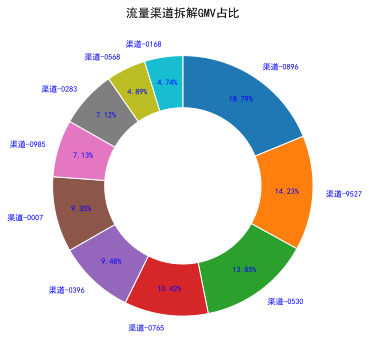

In [19]:
# 流量渠道拆解GMV占比（饼图）
gmv_ser = df.groupby('channelID').orderAmount.sum()
# 使用占比排在前十的渠道画图
gmv_ser.nlargest(10).plot(
    figsize=(6, 6),
    kind='pie',
    autopct='%.2f%%',
    pctdistance=0.8,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.4, edgecolor='white'),
    textprops=dict(fontsize=8, color='blue')
)
plt.title('流量渠道拆解GMV占比')
plt.ylabel('')
plt.show()

In [20]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

# 统计每个渠道的总销售额，取销售额最大的十个渠道
gmv_ser = df.groupby('channelID').orderAmount.sum()
gmv_ser = gmv_ser.nlargest(10)
# 将金额单位改为万
data = [
    [gmv_ser.index[i], np.round(gmv_ser.values[i] / 10000, 2)] 
    for i in range(gmv_ser.size)
]
# 饼图大小
pie_chart = Pie(init_opts=opts.InitOpts(width="800px", height="800px"))
# 饼图数据，饼图半径，饼图中心位置
pie_chart.add(
    "",
    data,
    radius="50%",
    center=["50%", "50%"],
)
# 饼图标题、图例设置
pie_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="GMV贡献Top10渠道"),
    legend_opts=opts.LegendOpts(type_="plain", pos_top="5%", orient="horizontal"),
)
pie_chart.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
#显示在notebook笔记本上
pie_chart.render_notebook()

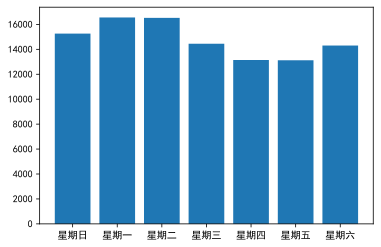

In [21]:
# 每天和每个时间段的销售情况（柱状图）
df['weekday'] = (df.orderTime.dt.dayofweek + 1) % 7
temp = pd.pivot_table(df, index='weekday', values='orderID', aggfunc='nunique')
x = [f'星期{x}' for x in '日一二三四五六']
plt.figure(figsize=(6, 4), dpi=120)
plt.bar(x, temp.orderID)
plt.show()

In [42]:
from pyecharts import options as opts
from pyecharts.charts import Bar

df['weekday'] = (df.orderTime.dt.dayofweek + 1) % 7
temp = pd.pivot_table(df, index='weekday', values='orderID', aggfunc='nunique')
x = [f'星期{x}' for x in '日一二三四五六']
bar = Bar()
bar.add_xaxis(x)
bar.add_yaxis("", list(temp.orderID))
bar.set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title="一周销售额"),
    )
bar.render_notebook()

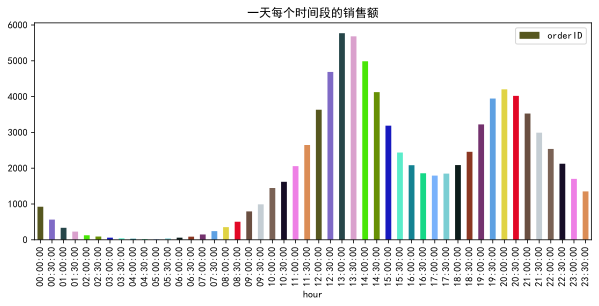

In [43]:
df['hour'] = df.orderTime.dt.floor('30T').dt.time
temp = pd.pivot_table(df, index='hour', values='orderID', aggfunc='nunique')
temp.plot(figsize=(10, 4), kind='bar', y='orderID', color=np.random.rand(24, 3))
plt.title('一天每个时间段的销售额')
plt.show()

In [23]:
# 用户复购率
temp = pd.pivot_table(df, index='userID', columns='month', values='orderID', aggfunc='nunique')
def handle_rebuy_data(x):
    if np.isnan(x):
        return x
    return 1 if x > 1 else 0


temp = temp.applymap(handle_rebuy_data)
temp

month,1,2,3,4,5,6,7,8,9,10,11,12
userID,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
user-100007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
user-299989,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [24]:
df = df[df.chargeback == '否']
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount,month,weekday,hour
id,,,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000,1,2,00:00:00
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,Wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507,1,2,00:00:00
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975,1,2,01:00:00
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,App,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811,1,2,01:00:00
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,Alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000,1,2,01:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104295,sys-2019-345050988,user-228042,PR000449,387.78,335.26,渠道-0396,Wechatmp,2019-12-31 23:17:36,2019-12-31 23:17:49,否,0.864562,12,2,23:00:00
104296,sys-2019-240533537,user-121909,PR000072,390.29,390.29,渠道-0896,Wechatmp,2019-12-31 23:27:29,2019-12-31 23:27:42,否,1.000000,12,2,23:00:00
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,Wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544,12,2,23:30:00


In [25]:
data_new = np.round(temp.sum() / temp.count(),4)
x_new = [f'{i}月' for i in range(1,13)]

line_chart = Line(init_opts=opts.InitOpts(width="720px", height="360px"))
line_chart.add_xaxis(xaxis_data=x_new)
line_chart.add_yaxis(
    series_name="复购率",
    y_axis=data_new
)

line_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="2019年复购率走势", subtitle=""),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(min_=0, max_=0.05)
)
line_chart.render_notebook()

# RFM模型

In [26]:
df['F'] = 1
temp = pd.pivot_table(
    df,
    index='userID',
    values=['orderTime', 'payment', 'F'],
    aggfunc={
        'orderTime': np.max,
        'payment': np.sum,
        'F': np.sum
    }
)
temp['R'] = (temp.orderTime - datetime(2019, 12, 31)).dt.days
temp['M'] = temp.payment
temp = temp[['R', 'F', 'M']]
temp

,R,F,M
userID,,,
user-100000,-79,1,1770.81
user-100003,-221,1,511.59
user-100006,-47,1,443.55
user-100007,-351,1,2162.14
user-100008,-45,1,4879.94
...,...,...,...
user-299980,-74,1,389.44
user-299983,-4,1,706.80
user-299989,-50,2,1637.47


In [27]:
temp.mean()

R    -148.909072
F       1.270887
M    1259.690355
dtype: float64

In [28]:
temp = temp.apply(lambda x: x - x.mean())
temp = temp.applymap(lambda x: '1' if x >= 0 else '0')
temp

,R,F,M
userID,,,
user-100000,1,0,1
user-100003,0,0,0
user-100006,1,0,0
user-100007,0,0,1
user-100008,1,0,1
...,...,...,...
user-299980,1,0,0
user-299983,1,0,0
user-299989,1,1,1


In [29]:
def make_tag(model):
    tags = {
        '111': '重要价值客户',
        '101': '重要发展客户',
        '011': '重要保持客户',
        '001': '重要挽留客户',
        '110': '一般价值客户',
        '100': '一般发展客户',
        '010': '一般保持客户',
        '000': '一般挽留客户'
    }
    key = model['R'] + model['F'] + model['M']
    return tags.get(key)


temp['TAG'] = temp.apply(make_tag, axis=1)
temp

,R,F,M,TAG
userID,,,,
user-100000,1,0,1,重要发展客户
user-100003,0,0,0,一般挽留客户
user-100006,1,0,0,一般发展客户
user-100007,0,0,1,重要挽留客户
user-100008,1,0,1,重要发展客户
...,...,...,...,...
user-299980,1,0,0,一般发展客户
user-299983,1,0,0,一般发展客户
user-299989,1,1,1,重要价值客户


In [30]:
ser = temp.groupby('TAG').TAG.count()
ser

TAG
一般价值客户     4039
一般保持客户     1427
一般发展客户    19776
一般挽留客户    22204
重要价值客户     7863
重要保持客户     2631
重要发展客户     5655
重要挽留客户     7010
Name: TAG, dtype: int64

In [31]:
gmv_ser

channelID
渠道-0896    17312782.80
渠道-9527    13117527.94
渠道-0530    12758609.77
渠道-0765     9602586.49
渠道-0396     8733737.57
渠道-0007     8617937.84
渠道-0985     6568554.04
渠道-0283     6559076.14
渠道-0568     4510473.30
渠道-0168     4371827.57
Name: orderAmount, dtype: float64

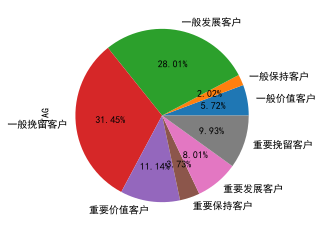

In [32]:
ser.plot(kind='pie', autopct='%.2f%%')
plt.show()

In [44]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

pie = Pie()
pie.add(
    "",
    [list(z) for z in zip(ser.index, ser)],
    center=["35%", "50%"],
)
pie.set_global_opts(
    title_opts=opts.TitleOpts(title="用户价值"),
    legend_opts=opts.LegendOpts(pos_left="15%"),
)
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie.render_notebook()